# Detection of Parkinson's Disease

## 1. Import Dataset

In [37]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/dataset_updated_pk2.csv")

# Check structure
print(df.shape)
print(df['status'].value_counts())  # 1 = Parkinson’s, 0 = Healthy
df.head()


(1000, 24)
status
1    541
0    459
Name: count, dtype: int64


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2. Normalizing Data

In [38]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=["status", "name"])
y = df["status"].astype(int)

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the result
print(X_scaled.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.819960     -0.431132     -0.944804       -0.010330          0.015916   
1    -0.761368     -0.526665     -0.044660        0.026568          0.016109   
2    -0.900499     -0.720327     -0.097154        0.043012          0.016302   
3    -0.900645     -0.645684     -0.101536        0.032383          0.016302   
4    -0.916752     -0.602511     -0.118022        0.089936          0.016687   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.054063  0.065160   -0.008978      0.249621          0.729933  ...   
1  0.073061  0.092116    0.046188      0.564173          1.725827  ...   
2  0.088859  0.108252    0.092450      0.403144          1.008784  ...   
3  0.080460  0.092496    0.067674      0.449433          1.183065  ...   
4  0.111057  0.132360    0.156906      0.616181          1.516690  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

## 3. Model training

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled test data back to DataFrame for SHAP and readability
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# 3. Train model on scaled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_df, y_train)

# 4. Evaluate on scaled test set
y_pred = clf.predict(X_test_df)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.47      0.51        95
           1       0.58      0.66      0.62       105

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.57      0.57       200



## Optimising hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, param_grid=param_grid)

## 4. SHAP interpretability

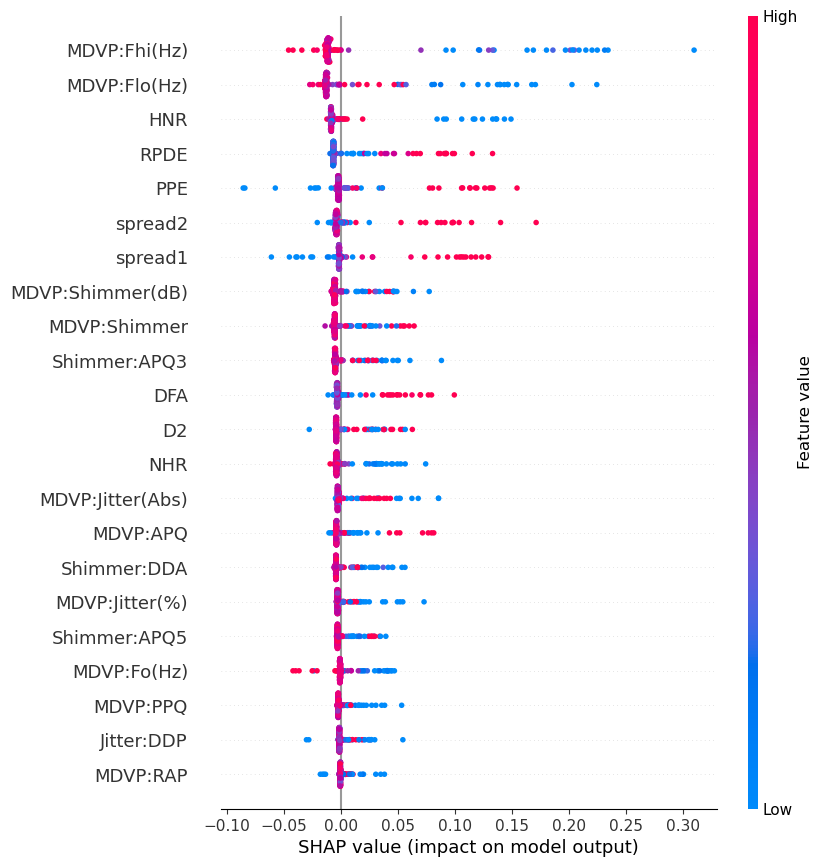

In [34]:
import shap
import numpy as np

# Use TreeExplainer for tree-based models like RandomForest
# explainer = shap.TreeExplainer(clf)

# # Pass the scaled, column-labeled test set to SHAP
# shap_values = explainer.shap_values(X_test_df)

explainer = shap.Explainer(clf, X_train_df)

shap_values = explainer(X_test_df)

shap.plots.beeswarm(shap_values[:, :, 1], max_display=22)


# # Get class 1 SHAP values (log-odds or probability contribution)
# shap_values_class1 = shap_values # Select output=1 across all samples and features

# # Confirm shapes match
# print("Fixed shape:", shap_values_class1.shape)  # Should now be (239, 22)
# print("X_test_df shape:", X_test_df.shape)

# # Plot SHAP summary
# shap.summary_plot(shap_values_class1, X_test_df, max_display=10, plot_type="bar", show=True)


## More metrics

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) # evaluate accuracy based on ytest
print(f"The model accuracy score is: {(100 * accuracy):.2f}%")


The model accuracy score is: 99.16%


## Confusion Matrix

Text(83.22222222222221, 0.5, 'predicted label')

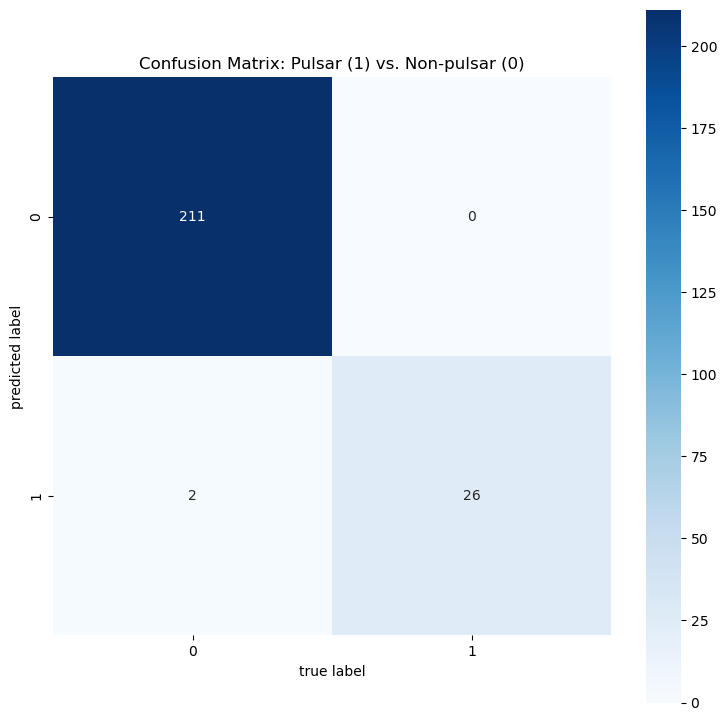

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_pred) # create confusion matrix based on ytest, predictions

fig = plt.figure(figsize=(9, 9)) # plot confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap='Blues')
plt.title("Confusion Matrix: Pulsar (1) vs. Non-pulsar (0)")
plt.xlabel('true label')
plt.ylabel('predicted label')